In [1]:
import torch
import numpy as np
import imageio
from Model.VideoUNet import VideoUNet

In [2]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
all_reigion = {
            "PFC": (0, 30),  
            "FEF": (30, 60),
            "LIP": (60, 90),
            "MT": (90, 110),
            "IT": (110, 120),
            "V4": (120, 140),
            "PFC_FEF": (0, 60),  
            "MT_IT_V4": (90, 140)
            }
def region(data, region):
    start, end = all_reigion[region]
    return data[:,:,start:end]

In [5]:
experiment_name = "PFC"
ncell=all_reigion[experiment_name][1]-all_reigion[experiment_name][0]

In [6]:
stat_dict=torch.load("Model/checkpoint.only-"+experiment_name+".pth")
model=VideoUNet(input_shape=[3,32,32],ncell=ncell,hiddensize=32)
model.load_state_dict(stat_dict)
model=model.eval()

In [7]:
test_input_complete=torch.load("data/test_input")
test_input_region=region(test_input_complete,experiment_name)
test_input_region=test_input_region.float()
batch_size_test=int(test_input_region.shape[0]/64)
model=model.to(torch.device(device))
img_list=[]
test_size=test_input_region.shape[0]
with torch.no_grad():
    for batch_idx in range(0, test_size, batch_size_test):
        batch_test = test_input_region[batch_idx:batch_idx + batch_size_test].to(torch.device(device))
        test_result = model(batch_test)
        img=torch.mean(test_result,dim=0)
        img=img.permute(1,2,3,0).to(torch.device("cpu")).detach().numpy()
        img_list.append(img)
output_filename="result/"
for i in range (16):
    for j in range (4):
        imgs=img_list[i*4+j]
        name=(output_filename+"Train_stimuli"+str(i)+"_cue"+str(j))
        with imageio.get_writer(name+'.gif', mode='I') as writer:
            for img in imgs:
                writer.append_data(np.array(img*255, dtype=np.uint8))
if len(img_list)==64:
    print("success")

success


/tmp/ipykernel_50429/2146243485.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


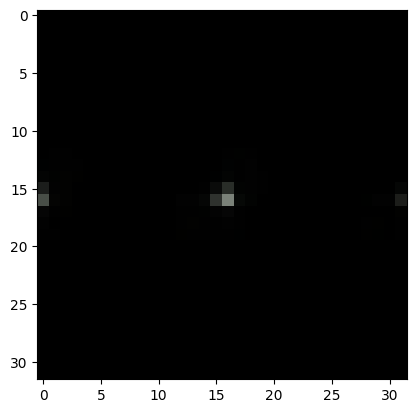

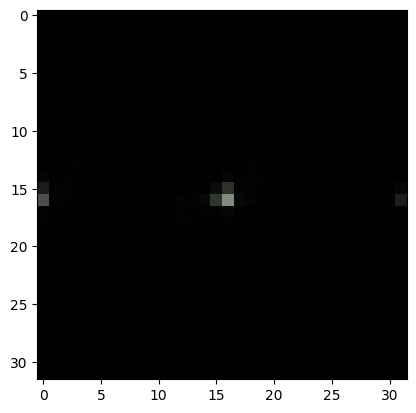

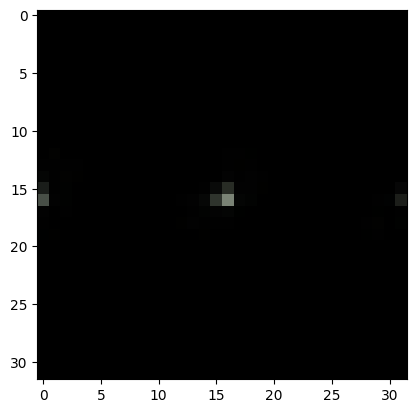

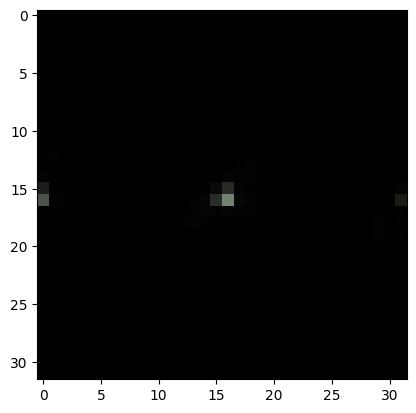

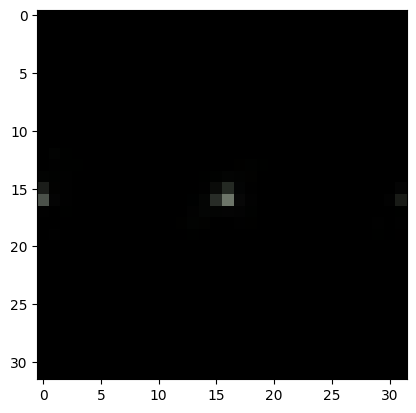

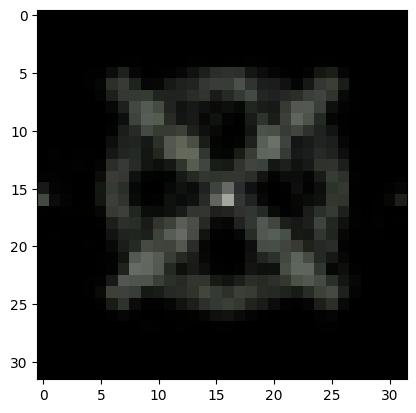

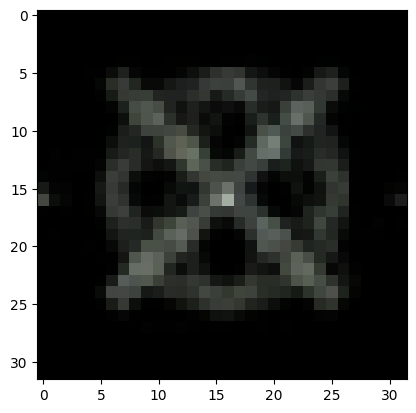

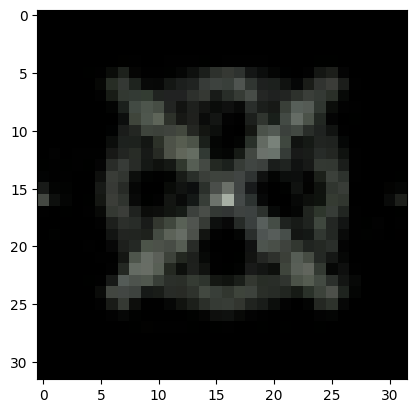

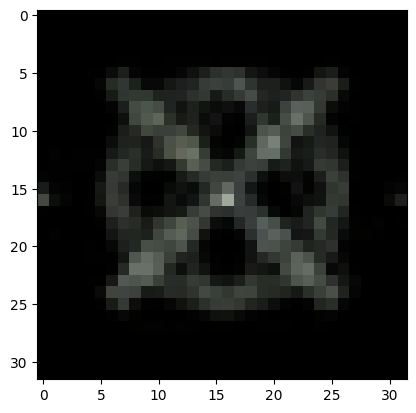

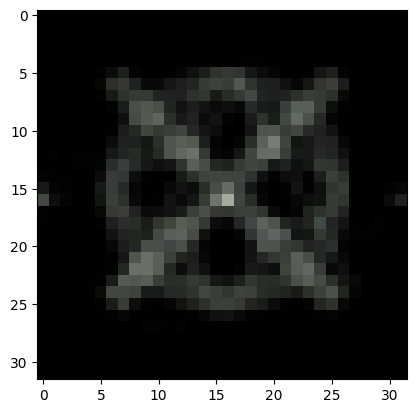

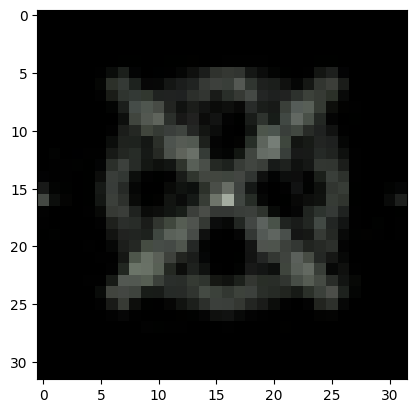

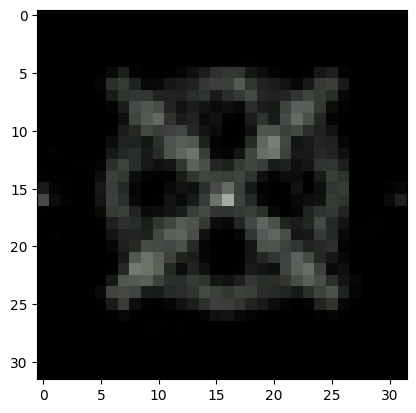

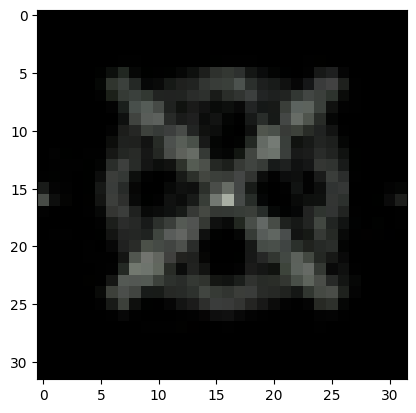

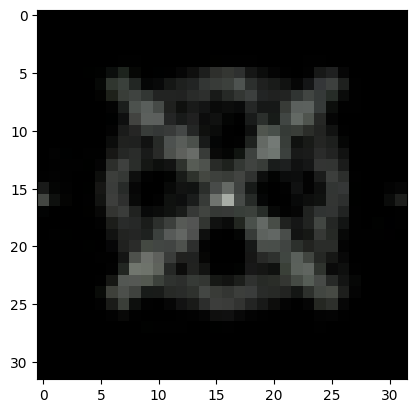

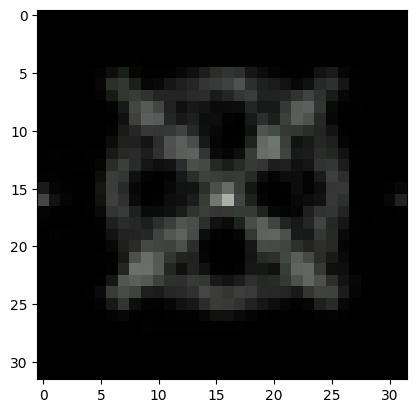

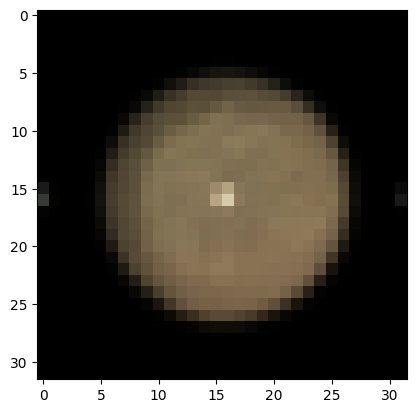

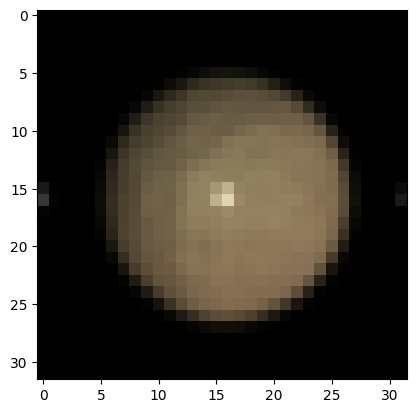

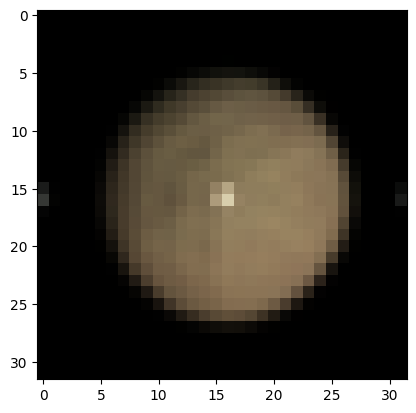

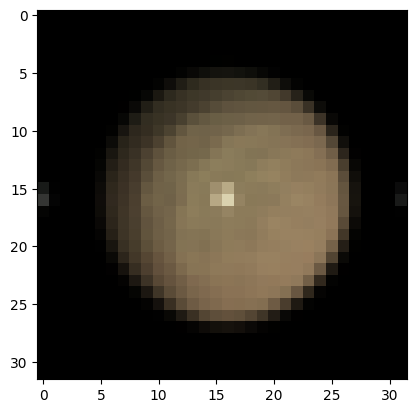

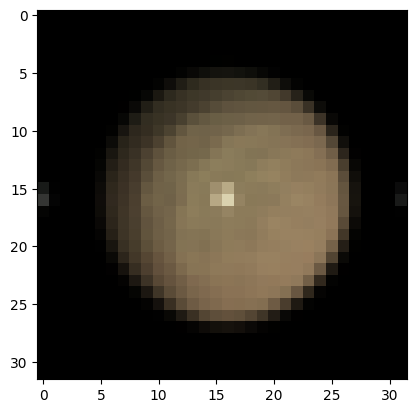

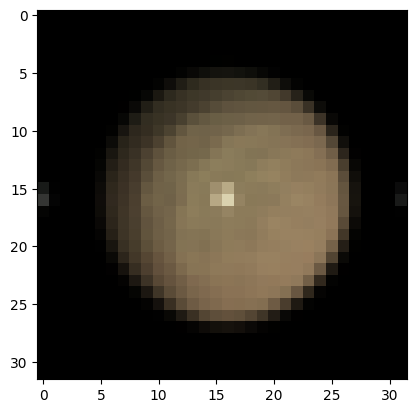

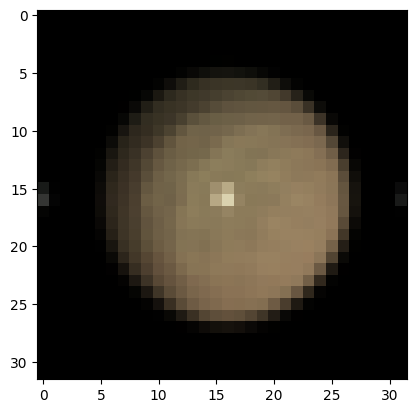

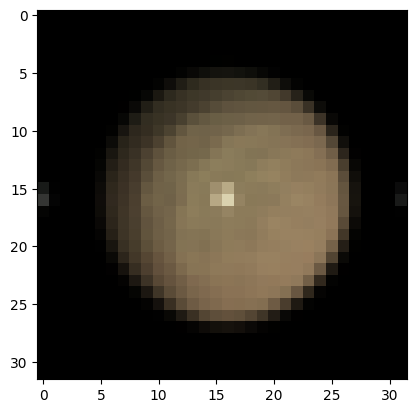

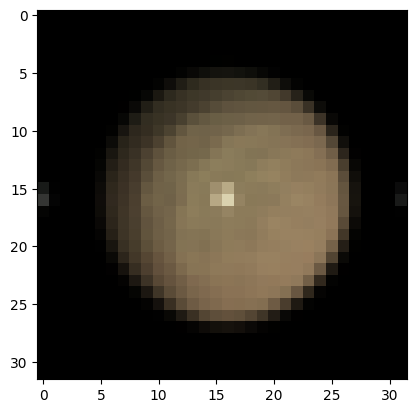

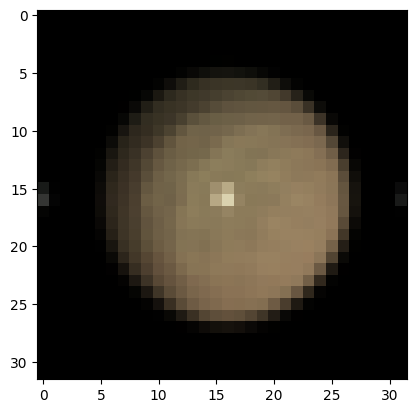

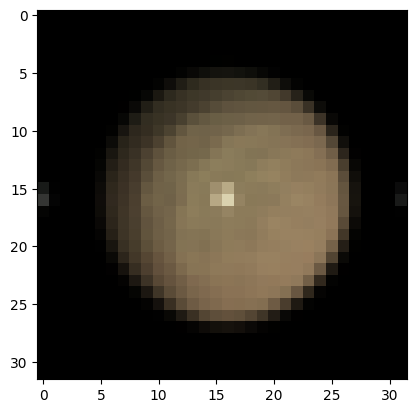

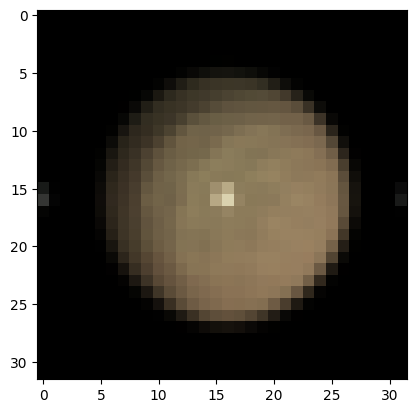

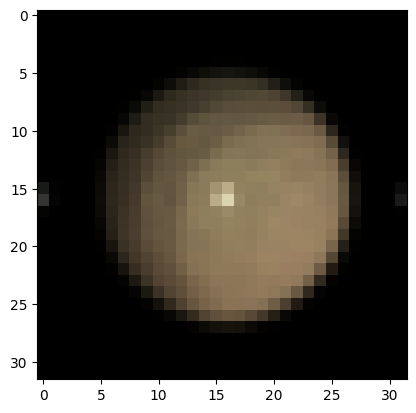

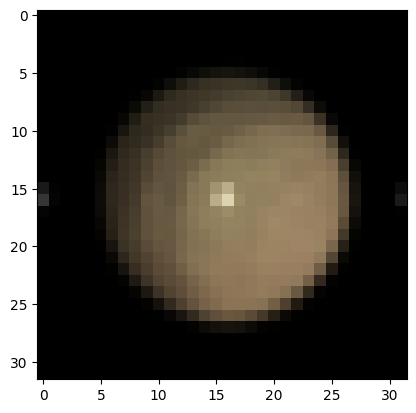

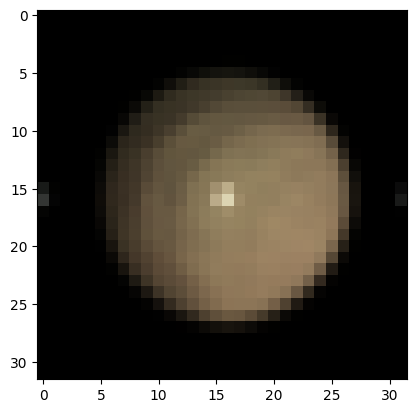

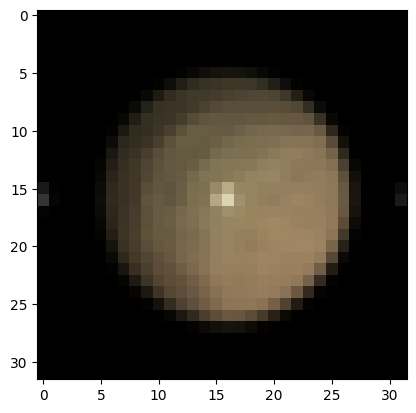

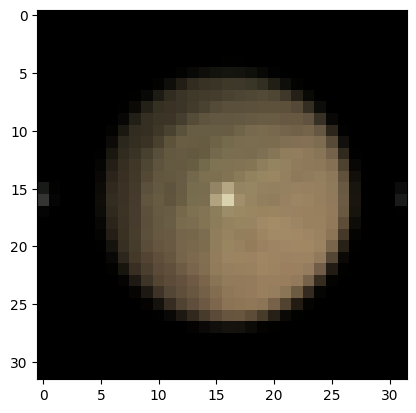

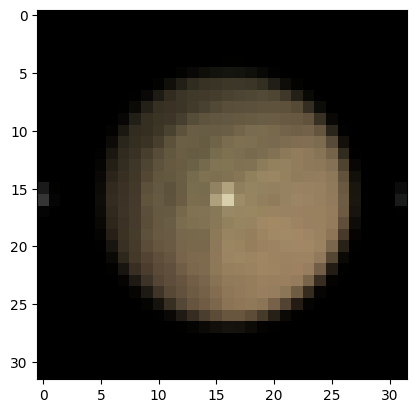

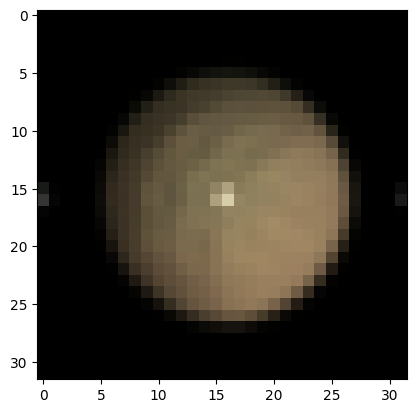

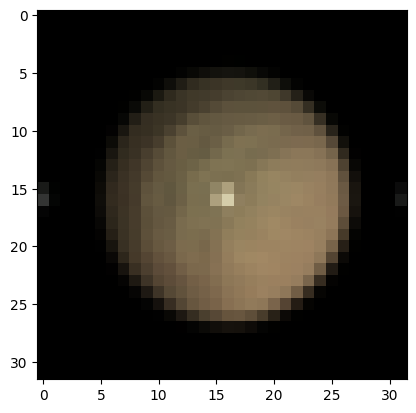

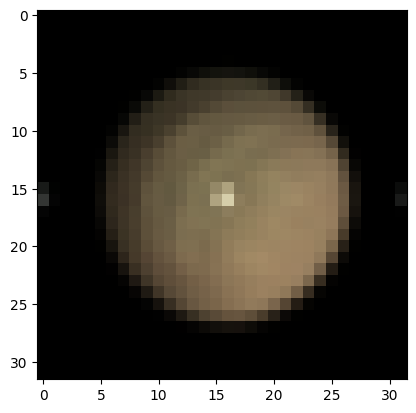

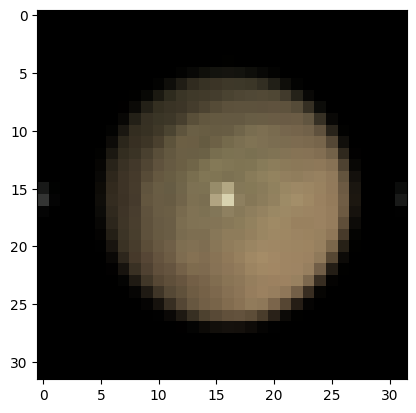

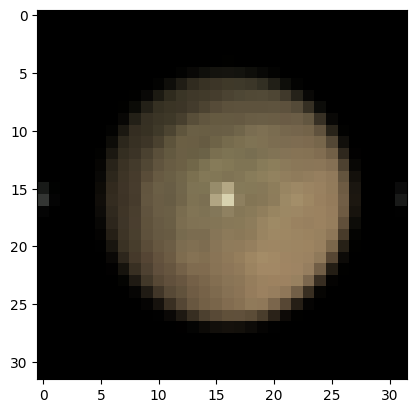

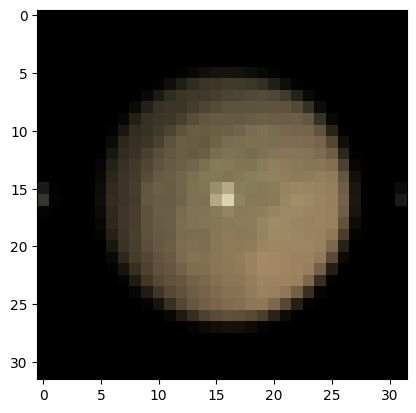

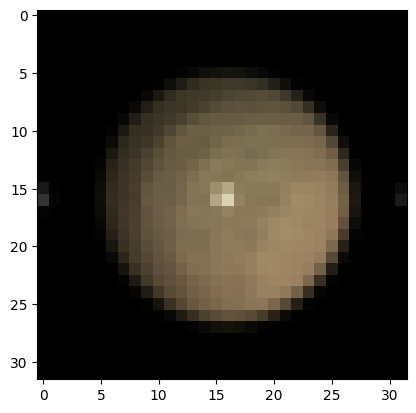

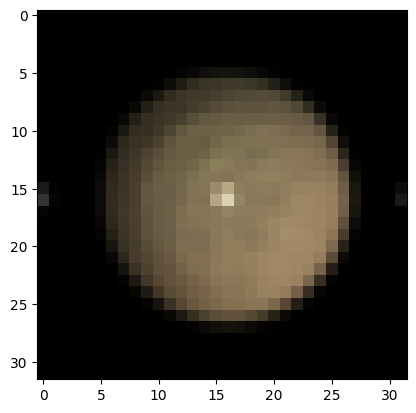

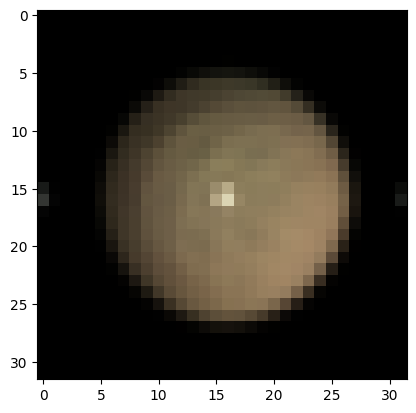

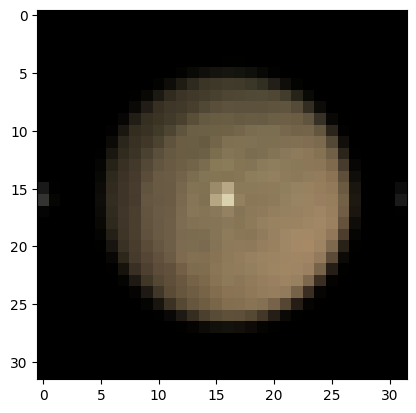

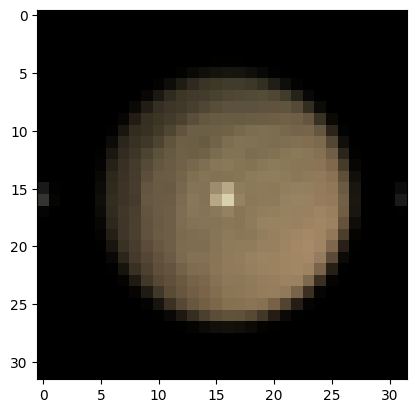

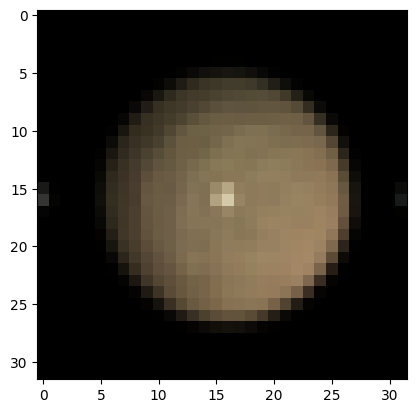

In [8]:
import matplotlib.pyplot as plt

i=5
j=5
imgs=img_list[i*4+j]
for img in imgs:
    plt.figure()
    plt.imshow(np.array(img*255, dtype=np.uint8))